# Αναγνώριση Προτύπων Μηχανικής Μάθησης
Εργασία 2 \\
Χρήστος Μπριστογιάννης sdi1900129 \\

##Ερώτημα 1: Αναγνώριση Προσώπων (Face recognition)

###Ζητούμενα i
Να γράψετε μία συνάρτηση loadImages(path, set_number) η οποία παίρνει ως είσοδο το
path στο οποίο βρίσκεται ο φάκελος των εικόνων π.χ. loadImages(“C:/images”, “Set_1”),
διαβάζει τις εικόνες και επιστέφει έναν πίνακα δεδομένων ανάλογα με το set_number,
όπου κάθε εικόνα αναπαρίσταται ως διάνυσμα στήλη. Η συνάρτηση επιστέφει επίσης τις
κατηγορίες (labels) στις οποίες ανήκουν οι διαφορετικές εικόνες κωδικοποιημένες με
ακεραίους (π.χ. 0 για φωτογραφίες που ανήκουν στο person_0, 1 για τις φωτογραφίες
που ανήκουν στο person_1 κτλ).

In [ ]:
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

def loadImages(path, set_number):
  if set_number == "Set_1":
    start = 1
    end = 7
  elif set_number == "Set_2":
    start = 8
    end = 19
  elif set_number == "Set_3":
    start = 20
    end = 31
  elif set_number == "Set_4":
    start = 32
    end = 45
  elif set_number == "Set_5":
    start = 46
    end = 64
  else:
    print("Error")
    return

  arr = []
  labels = []
  for i in range(1, 11, 1):
    for j in range(start, end+1, 1):
      if i == 10:
        mes = 'person10'+'_'
      else:
        mes = 'person0'+str(i)+'_'
      if j < 10:
        mes = mes+'0'+str(j)
      else:
        mes = mes + str(j)

      img = cv2.imread(path+ mes + '.png', 0)
      
      arr.append(np.reshape(img,-1))
      labels.append(i)
  return arr, labels


#load images
numberOfSets = 5
nmsset = ["Set_1", "Set_2", "Set_3", "Set_4", "Set_5"]
imgset = [None] * numberOfSets
lblset = [None] * numberOfSets
path = '/content/drive/My Drive/faces/faces/'

for i in range(0, numberOfSets):
  imgset[i], lblset[i] = loadImages(path, nmsset[i])
  print(imgset[i])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[array([ 94, 114, 115, ...,  76,  67,  70], dtype=uint8), array([ 93, 109, 112, ...,  97,  79,  99], dtype=uint8), array([ 85,  97, 104, ...,  63,  53,  58], dtype=uint8), array([111, 126, 134, ...,  67,  59,  66], dtype=uint8), array([115, 130, 144, ...,  59,  54,  49], dtype=uint8), array([82, 95, 99, ..., 93, 83, 91], dtype=uint8), array([130, 150, 164, ...,  61,  57,  52], dtype=uint8), array([ 33,  46,  62, ..., 136, 133, 127], dtype=uint8), array([ 32,  38,  54, ..., 169, 171, 164], dtype=uint8), array([ 22,  27,  42, ..., 119, 122, 114], dtype=uint8), array([ 43,  52,  59, ..., 142, 142, 136], dtype=uint8), array([ 36,  49,  61, ..., 131, 130, 124], dtype=uint8), array([ 25,  33,  43, ..., 154, 160, 155], dtype=uint8), array([ 51,  57,  64, ..., 133, 135, 128], dtype=uint8), array([103,  88,  95, ..., 101,  95,  96], dtype=uint8), array([ 80,  76,  86,

###Ζητούμενα ii
Να εκπαιδεύσετε την μέθοδο Eigenfaces με d = 9 και d = 30 χρησιμοποιώντας όλες τις
εικόνες στο Set_1 (70 εικόνες) και να αναγνωρίσετε τα πρόσωπα στα Set_1 έως Set_5.
Για κάθε Set και κάθε τιμή της διάστασης d να αναφέρετε την ακρίβεια ταξινόμησης. Για
το Set_1 αναμένουμε 100% ακρίβεια ταξινόμησης καθώς χρησιμοποιήθηκε για την
εκπαίδευση της μεθόδου Eigenfaces. Σχολιάστε την δυνατότητα γενίκευσης της μεθόδου
στα διαφορετικά Sets.

In [40]:
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# PCA 30 comp
pca = PCA(n_components = 30, whiten=True).fit(imgset[0], lblset[0])
comp30 = []
for i in range(0, numberOfSets):
  comp30.append( pca.transform(imgset[i]))

# Restruct for 4 
proj30 = []
for i in range(0, numberOfSets):
  proj30.append(pca.inverse_transform(comp30[i]))

# Training and accuracy
model.fit(comp30[0], lblset[0])
print('For comp = 9')
for i in range(0, numberOfSets):
  print(f'Accuracy for set_1 and set_{i+1} is: {model.score(comp30[i], lblset[i], sample_weight=None):.4f}')


# PCA 9 comp
pca = PCA(n_components = 9, whiten=True).fit(imgset[0], lblset[0])
comp9 = []
for i in range(0, numberOfSets):
  comp9.append( pca.transform(imgset[i]))

# Restruct for 4 
proj9 = []
for i in range(0, numberOfSets):
  proj9.append(pca.inverse_transform(comp9[i]))

# Training and accuracy
model.fit(comp9[0], lblset[0])
print('\nFor comp = 9')
for i in range(0, numberOfSets):
  print(f'Accuracy for set_1 and set_{i+1} is: {model.score(comp9[i], lblset[i], sample_weight=None):.4f}')

For comp = 9
Accuracy for set_1 and set_1 is: 1.0000
Accuracy for set_1 and set_2 is: 0.9667
Accuracy for set_1 and set_3 is: 0.9500
Accuracy for set_1 and set_4 is: 0.6929
Accuracy for set_1 and set_5 is: 0.2421

For comp = 9
Accuracy for set_1 and set_1 is: 1.0000
Accuracy for set_1 and set_2 is: 0.9500
Accuracy for set_1 and set_3 is: 0.6167
Accuracy for set_1 and set_4 is: 0.2286
Accuracy for set_1 and set_5 is: 0.1105


Παρατηρούμε ότι για το set_1 η ακρίβεια είναι 100% καθώς χρησιμοποιήθηκε για την
εκπαίδευση της μεθόδου Eigenfaces. Επίσης για τα set_4 και set_5 παρατηρούμε πολύ ποιο μεγάλη διαφορά ανακρίβεια από τα άλλα set σε αυτό ευθύνεται η έντονη σκίαση των φωτογραφιών και όσο μειώνουμε τις διαστάσεις αυτό το φαινόμενο φαίνεται ακόμα πιο έντονα. Επίσης, όσο μειώνετε τις διαστάσεις (από 30 σε 9), η ακρίβεια μειώνεται ακόμα περισσότερο, καθώς χάνονται περισσότερες λεπτομέρειες και πληροφορίες από τις εικόνες.

###Ζητούμενα iii

Να απεικονίσετε (σε μορφή εικόνας) τα 9 κύρια ιδιοδιανύσματα (9 top eigenvectors) που
προέκυψαν αφού εκπαιδεύσατε την μέθοδο Eigenfaces στο Set_1. Τι παρατηρείτε; Τι θα
μπορούσαμε να πούμε ότι εκφράζουν τα διαφορετικά ιδιοδιανύσματα;

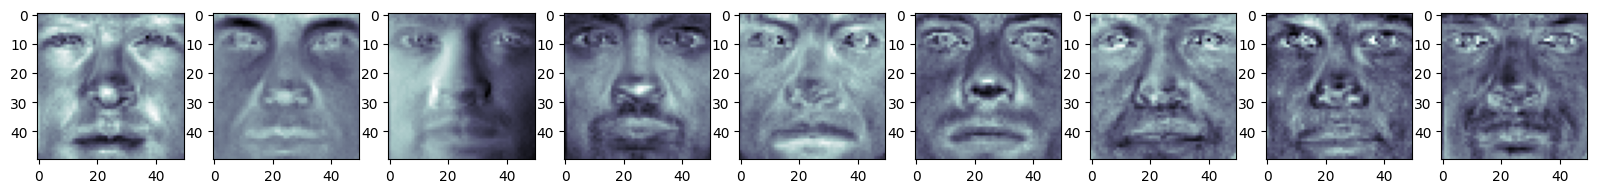

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
counter = 1
for i in range(0,9,1):
  plt.subplot(3, 9, counter)
  counter += 1 
  plt.imshow(pca.components_[i].reshape(50, 50), cmap='bone')

Παρατηρούμε ότι για τις αρχικές φωτογραφίες μπορούμε να διακρίνουμε απλά χαρακτηριστικά όπως μάτια φρίδια στόμα μύτη χωρίς λεπτομέριες. Στα μετέπειτα ιδιοδιανύσματα παρατηρούμε ότι εκφράζονται πιο συγκεκριμένες λεπτομέρειες ή παραλλαγές όπως γωνίες και σχήματα

###Ζητούμενα iv

Να χρησιμοποιήσετε d = 9 και d = 30 Eigenfaces που βρήκατε από το Set_1, για να
ανακατασκευάσετε μια τυχαία εικόνα από κάθε ένα από τα 5 Sets. Να απεικονίσετε τόσο
τις αρχικές εικόνες όσο και τις ανακατασκευασμένες της για διαφορετικές τιμές του d.
Να σχολιάσετε την ποιότητα ανακατασκευής κάθε εικόνας

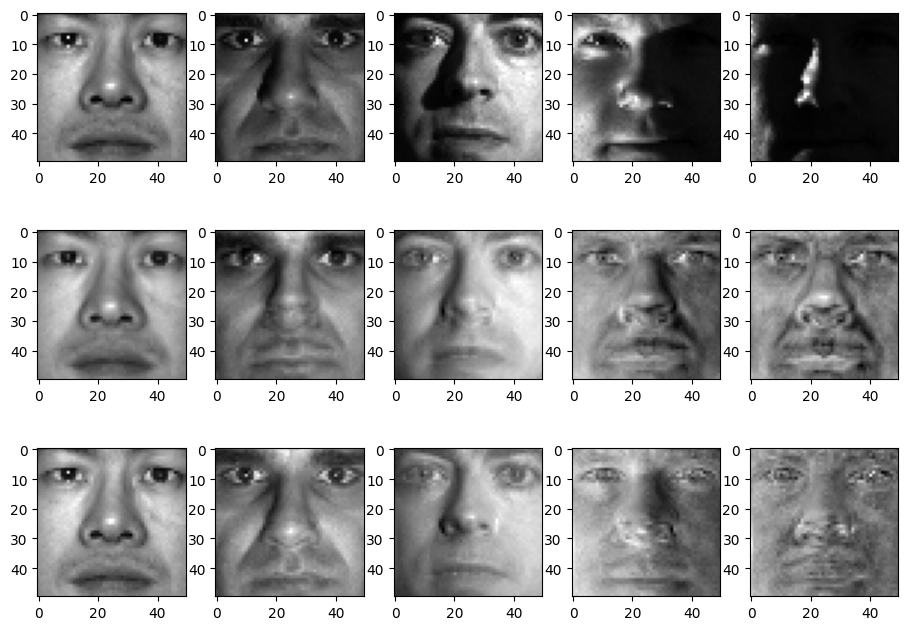

In [50]:
import random

# Τυχαίες φωτογραφίες από κάθε Set
rand = []
for i in range(0, numberOfSets):
  rand.append(random.randint(0,len(imgset[i])))


plt.figure(figsize=(18, 8))
count = 1;
for j in range(0, numberOfSets):
  # Αρχική εικόνα
  plt.subplot(3, 8, count)
  plt.imshow(imgset[j][rand[j]].reshape(50, 50), cmap='binary_r')
  
  # Προβολή με d=9
  plt.subplot(3, 8, count + 8)
  plt.imshow(proj9[j][rand[j]].reshape(50, 50), cmap='binary_r')
  
  # Προβολή με d=30
  plt.subplot(3, 8, count + 16)
  plt.imshow(proj30[j][rand[j]].reshape(50, 50), cmap='binary_r')
  
  count += 1

Αναλύουμε για κάθε εικόνα \\

Για Set 1 και Set 2: \\
Η αρχική εικόνα ανακατασκευάζεται πολύ καλά και διατηρεί τα βασικά χαρακτηριστικά της και για d=9 και d=30 και για τα δύο Set \\

Για Set 3: \\
Η αρχική εικόνα ανακατασκευάζεται αρκετά καλά για d = 9 αλλά παρατηρείται βελτιώση σε λεπτομέριες για d = 30

Για Set 4 και Set 5: \\
Η ανακατασκευή της αρχικής εικόνας για d = 9 είναι ανεπαρκής μη αναγνωρίσιμη για d = 30 υπάρχει μια βελτιώση αλλά ειδικά σε σκούρες περιοχές τα χαρακτηριστικά χάνονται τελειώς. \\



###Ζητούμενα v

Να απεικονίσετε τα 9 κύρια singular vectors που προκύπτουν αφού εφαρμόσετε SVD
στον πίνακα δεδομένων του Set_1. Διαφέρουν τα singular vectors από τα αντίστοιχα
ιδιοδιανύσματα; Αν ναι, γιατί;

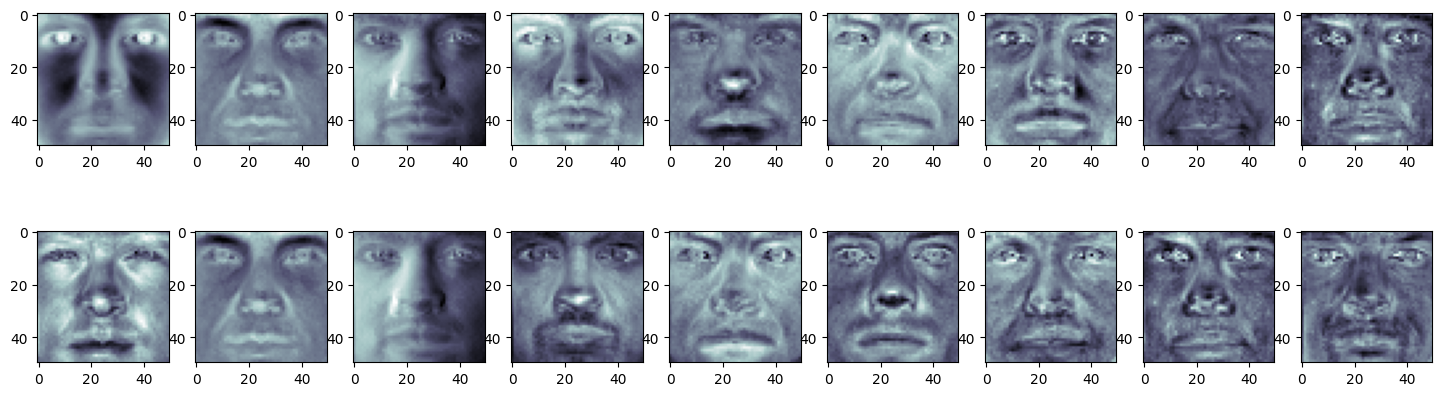

In [48]:
from numpy import linalg

U, s, VT = np.linalg.svd(imgset[0])

plt.figure(figsize=(18, 8))
counter = 1
for i in range(0, 9, 1):
  # Ιδιοδιανύσματα από SVD
  plt.subplot(3, 9, counter)
  counter += 1
  plt.imshow(VT[i].reshape(50, 50), cmap='bone')
  
  # Ιδιοδιανύσματα από Eigenfaces
  plt.subplot(3, 9, counter + 8)
  plt.imshow(pca.components_[i].reshape(50, 50), cmap='bone')


Οι singular vectors προκύπτουν από την εφαρμογή της μεθόδου Singular Value Decomposition (SVD) σε έναν πίνακα δεδομένων. Η SVD αναλύει τον πίνακα σε τρία μέρη, τον πίνακα U, τον διαγώνιο πίνακα Σ και τον πίνακα V^T. Οι singular vectors είναι οι στήλες του πίνακα U. \\
Τα ιδιοδιανύσματα προκύπτουν από την εφαρμογή της μεθόδου ιδιοτιμών και ιδιοδιανυσμάτων σε έναν τετραγωνικό πίνακα. \\
Οι δύο μέθοδοι έχουν διαφορετική αναπαράσταση των δεδομένων και οδηγούν σε διαφορετικα αποτελέσματα. 



##Ερώτημα 2: Ταξινόμηση εικόνων χρησιμοποιώντας SVMs

###Ζητούμενα i

Ζητείται να φορτώσετε τα δεδομένα του συνόλου MNIST και να μετατρέψετε κάθε
εικόνα σε μορφή διανύσματος διάστασης 28 x 28 = 784. Στη συνέχεια
κανονικοποιήστε (normalize) τα δεδομένα στο διάστημα [0,1].
Το σύνολο δεδομένων MNIST αποτελείται από 70000 εικόνες
χειρόγραφων ψηφίων και, τυπικά, χωρίζεται σε τρία υποσύνολα: training set (50000
εικόνες), validation set (10000 εικόνες), test set (10000 εικόνες).

In [1]:
import numpy as np
import random

from sklearn.datasets import fetch_openml

# Φόρτωσει δεδομένων
mnist = fetch_openml('mnist_784')

# Μετατρέπουμε τις εικόνες σε μορφή διανύσματος διαστάσεων 28 x 28
X = np.array(mnist.data)
Y = np.array(mnist.target)
X = X.reshape(-1, 28, 28)

# Κανονικοποιούμε τα δεδομένα στο διάστημα [0,1]
X = X / 255.0

# Η συνάρτηση δέχεται τα δεδομένα data labels και τον τρόπο που θέλει να χωρίστουν τα set μεταξύ τους
# ανακατεύει την λίστα ώστε να μην έχουμε πάντα τα ίδια set μετά τα διασπάει σύμφωνα με sizes που δέχεται
# και μετά επιστρέφει 6 λίστες data και labels
def split_shuffle_dataset(data, labels, train_size, val_size, test_size):
  
  # Ένωση ανακάτεμα και διάσπαση λιστών data και labels
  combined = list(zip(data, labels))  
  random.shuffle(combined)
  shuffled_data, shuffled_labels = zip(*combined)

  # Διάσπαση νέων λιστών σε κομμάτια
  trainData = np.array(shuffled_data[:train_size])
  trainLbl = np.array(shuffled_labels[:train_size])
  valData = np.array(shuffled_data[train_size:train_size + val_size])
  valLbl = np.array(shuffled_labels[train_size:train_size + val_size])
  testData = np.array(shuffled_data[train_size + val_size:])
  testLbl = np.array(shuffled_labels[train_size + val_size:])

  return trainData, trainLbl, valData, valLbl, testData, testLbl

# Έτοιμες λίστες
trainData, trainLbl, valData, valLbl, testData, testLbl = split_shuffle_dataset(X, Y, 50000, 10000, 10000)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Στα παρακάτω κείμενα γράφουμε τα αποτελέσματα για μειώση όλων των Set κατά 25/100 δηλαδή 12500, 2500, 2500. Το οποίο έγινε εξαιτίας του υπερβολικού χρόνου εκτέλεσης που χρειαζόταν (περίπου 8 ώρες).

###Ζητούμενα ii

Στα SVMs υπάρχουν διάφορες επιλογές που μπορεί να επηρεάσουν την απόδοση
τους σε προβλήματα ταξινόμησης. Παραδείγματα τέτοιων επιλογών αποτελούν ο
τύπος του πυρήνα (kernel) και οι τιμές των διάφορων (υπερ)παραμέτρων. Ζητείται
να εξετάσετε την επίδοση των SVMs για γραμμικό (linear SVMs) και RBF πυρήνα και
διαφορετικές τιμές παραμέτρων ώστε να καθορίσετε το συνδυασμό
παραμέτρων/πυρήνων που οδηγούν στη μεγαλύτερη ακρίβεια ταξινόμησης. Για
4
αυτό το πείραμα να χρησιμοποιήσετε 60000 εικόνες για εκπαίδευση (training) και
10000 παραδείγματα για δοκιμές (test). Να αναφέρετε τις τιμές των παραμέτρων,
δηλαδή τύπο πυρήνα, τιμές των C και gamma που οδηγούν στις καλύτερες επιδόσεις
τόσο στο σύνολο εκπαίδευσης όσο και στο σύνολο δοκιμής (test set).

In [2]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time

# Ορισμός των τιμών για τον πυρήνα (kernel), το C και το gamma που θα δοκιμαστούν
kernel_values = ['linear', 'rbf']
c_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]
sum_execution = 0

best_c = np.zeros(2, dtype=float)
best_gamma = np.zeros(2, dtype=float)

# Επανάληψη για κάθε τιμή πυρήνα
kernel_id = 0
for kernel in kernel_values:
    best_accuracy = 0
    
    print(f'Test kernel {kernel}')

    # Επανάληψη για κάθε τιμή C και gamma
    for c in c_values:
        for gamma in gamma_values:

            # Εκπαίδευση του μοντέλου SVM και υπολογισμός χρόνου που του πήρε
            svm_model = svm.SVC(kernel=kernel, C=c, gamma=gamma)

            start_time = time.time()
            svm_model.fit(trainData.reshape(trainData.shape[0], -1), trainLbl)
            execution_time = time.time() - start_time
            sum_execution += execution_time
            
            # Πρόβλεψη του validation set με το μοντέλο SVM
            val_predictions = svm_model.predict(valData.reshape(valData.shape[0], -1))
            val_accuracy = accuracy_score(valLbl, val_predictions)

            print(f' for values C={c} and gamma={gamma} the accuracy is {val_accuracy} and execution time is {execution_time}')

            # Εύρεση της καλύτερης ακρίβειας για τις παραμέτρους C και gamma
            if val_accuracy > best_accuracy:               
                best_accuracy = val_accuracy
                best_c[kernel_id] = c
                best_gamma[kernel_id] = gamma

    # Εκπαίδευση του μοντέλου SVM με τις καλύτερες παραμέτρους
    svm_model = svm.SVC(kernel=kernel, C=best_c[kernel_id], gamma=best_gamma[kernel_id])
    svm_model.fit(trainData.reshape(trainData.shape[0], -1), trainLbl)

    # Πρόβλεψη του test set με το μοντέλο SVM και τις καλύτερες παραμέτρους
    test_predictions = svm_model.predict(testData.reshape(testData.shape[0], -1))
    test_accuracy = accuracy_score(testLbl, test_predictions)

    # Εκτύπωση αποτελέσμάτων για τα δύο kernel
    print(f'Best hyperparameters for {kernel} kernel: C={best_c[kernel_id]}, gamma={best_gamma[kernel_id]} and average execution time {sum_execution/(len(c_values)*len(gamma_values))}')
    print(f'Validation accuracy: {best_accuracy:.4f}')
    print(f'Test accuracy: {test_accuracy:.4f}\n')
    sum_execution = 0
    kernel_id += 1


Test kernel linear
 for values C=0.1 and gamma=0.001 the accuracy is 0.9352 and execution time is 10.44903826713562
 for values C=0.1 and gamma=0.01 the accuracy is 0.9352 and execution time is 10.010604858398438
 for values C=0.1 and gamma=0.1 the accuracy is 0.9352 and execution time is 10.037213563919067
 for values C=0.1 and gamma=1 the accuracy is 0.9352 and execution time is 10.218500852584839
 for values C=1 and gamma=0.001 the accuracy is 0.92 and execution time is 10.464805126190186
 for values C=1 and gamma=0.01 the accuracy is 0.92 and execution time is 10.209148406982422
 for values C=1 and gamma=0.1 the accuracy is 0.92 and execution time is 10.117458820343018
 for values C=1 and gamma=1 the accuracy is 0.92 and execution time is 10.09375262260437
 for values C=10 and gamma=0.001 the accuracy is 0.9112 and execution time is 11.058156490325928
 for values C=10 and gamma=0.01 the accuracy is 0.9112 and execution time is 11.190568447113037
 for values C=10 and gamma=0.1 the a

Για τον γραμμικό πυρήνα (linear), παρατηρούμε ότι η ακρίβεια ταξινόμησης στο σύνολο επικύρωσης είναι 0.9352 και στο σύνολο ελέγχου είναι 0.94. Η μέση τιμή εκτέλεσης είναι 10.1972s. Αυτά τα αποτελέσματα δείχνουν ότι ο γραμμικός πυρήνας επιτυγχάνει μια αξιοπρεπή ακρίβεια ταξινόμηση και είναι σχετικά γρήγορος ως προς την εκτέλεση. Επίσης η ακρίβεια είναι σχετικά σταθερή,( όπως και ο χρόνος εκτέλεσης), ανάμεσα στο 0.91 και 0.932 για όλους τους συνδιασμούς υπερπαμέτρων ενώ έχει καλύτερα αποτελέσματα για C=0.1, gamma=0.001. \\
Από την άλλη πλευρά, για τον πυρήνα rbf, παρατηρούμε πολύ υψηλή ακρίβεια ταξινόμησης, το σύνολο επικύρωσης είναι 0.9676 και το σύνολο ελέγχου είναι 0.9687. Η μέση τιμή εκτέλεσης είναι 76.5s όπου είναι πολύ υψηλός. Αντίθετα με την (linear) παρατηρούμε ότι οι υπερμπαράμετροι έχουν πολύ μεγαλύτερο ρόλο στην ακρίβεια και οι τιμές να κυμαίνονται σε μεγαλύτερο σύνολο (0,885 - 0.9732), δεν αναφερόμαστε σε gamma=1. Η ακρίβεια αυξάνεται καθώς αυξάνεται η παράμετρος C, αλλά η επιλογή της κατάλληλης τιμής για την παράμετρο gamma είναι επίσης σημαντική.


###Ζητούμενα iii

Στη συνέχεια, να εφαρμόσετε PCA στα δεδομένα επιλέγοντας 3 διαφορετικές τιμές
για τη διατηρούμενη διακύμανση και για κάθε τιμή διακύμανσης εκτελέστε ξανά τη
μέθοδο SVM χρησιμοποιώντας τις παραμέτρους που οδήγησαν στην καλύτερη
επίδοση στο παραπάνω ερώτημα. Για κάθε εκτέλεση, αναφέρετε τον αριθμό των
συνιστωσών (components) που διατηρούνται καθώς και την ακρίβειας ταξινόμησης.
Επίσης, καταγράψτε τους χρόνους εκτέλεσης κάθε πειράματος και εξαγάγετε
συμπεράσματα σχετικά με μια πιθανή αντιστάθμιση (trade-off) μεταξύ ακρίβειας
ταξινόμησης, μείωσης διαστάσεων και χρόνου εκτέλεσης του αλγορίθμου.

In [3]:
from sklearn.decomposition import PCA

# 3 διαφορετικές τιμές για τη διατηρούμενη διακύμανση
variance_ratios = [0.5, 0.8, 0.95]

# PCA και SVM για κάθε variance_ratio με τις καλύτερες παραμέτρους
kernel_id = 0
for kernel in kernel_values:
    print(f'Test kernel {kernel}')

    for variance_ratio in variance_ratios:
        print(f' Testing PCA with variance ratio {variance_ratio}')

        # PCA
        pca = PCA(n_components=variance_ratio)
        pca_trainData = pca.fit_transform(trainData.reshape(trainData.shape[0], -1))
        pca_valData = pca.transform(valData.reshape(valData.shape[0], -1))
        pca_testData = pca.transform(testData.reshape(testData.shape[0], -1))
        components = pca.n_components_

        # SVM με καλύτερες παραμέτρους
        svm_model = svm.SVC(kernel=kernel, C=best_c[kernel_id], gamma=best_gamma[kernel_id])
        
        start_time = time.time()
        svm_model.fit(pca_trainData, trainLbl)
        execution_time = time.time() - start_time

        # Έλενχος SVM στο Validation set μετά απο pca
        val_predictions = svm_model.predict(pca_valData)
        val_accuracy = accuracy_score(valLbl, val_predictions)

        # Έλενχος SVM στο Test set μετά απο pca
        test_predictions = svm_model.predict(pca_testData)
        test_accuracy = accuracy_score(testLbl, test_predictions)

        print(f' Number of components: {components}')
        print(f' Validation accuracy: {val_accuracy:.4f}')
        print(f' Test accuracy: {test_accuracy:.4f}')
        print(f' Execution time: {execution_time:.4f} seconds\n')
    kernel_id += 1


Test kernel linear
 Testing PCA with variance ratio 0.5
 Number of components: 11
 Validation accuracy: 0.8492
 Test accuracy: 0.8444
 Execution time: 5.9233 seconds

 Testing PCA with variance ratio 0.8
 Number of components: 43
 Validation accuracy: 0.9268
 Test accuracy: 0.9234
 Execution time: 1.8147 seconds

 Testing PCA with variance ratio 0.95
 Number of components: 152
 Validation accuracy: 0.9356
 Test accuracy: 0.9313
 Execution time: 3.6113 seconds

Test kernel rbf
 Testing PCA with variance ratio 0.5
 Number of components: 11
 Validation accuracy: 0.9292
 Test accuracy: 0.9248
 Execution time: 1.4868 seconds

 Testing PCA with variance ratio 0.8
 Number of components: 43
 Validation accuracy: 0.9696
 Test accuracy: 0.9694
 Execution time: 2.1842 seconds

 Testing PCA with variance ratio 0.95
 Number of components: 152
 Validation accuracy: 0.9724
 Test accuracy: 0.9691
 Execution time: 3.9903 seconds



Όσον αφορά την εφαρμογή του PCA, παρατηρούμε ότι έχουμε πολύ μεγάλη μειώση χρόνου εκτέλεσης και όχι μεγάλη διαφορά στην ακρίβεια. Πιο συγκεκριμένα για ratio 0.5 τα απότελέσματα δεν είναι ικανοποιητικά. Αυξάνοντας το ratio σε 0.8 παράτηρούμε για linear διαφορά -0,01 και για rbf +0,004 που σημαίνει ότι ήταν εξήσου αποτελεσματικά και σε μικρότερο χρόνο. Τέλος για 0.95 παρατηρούμε πολύ μικρές αυξήσεις στην ακρίβεια και για τα δύο kernel και ταυτόχρονα μεγάλη μειώση του χρόνου εκτέλεσης.
Η μέθοδος PCA μπορεί να επιρεάσει θετικά την ακρίβεια εξαρτώμενο από πολλούς παράγοντες όπως το DataSet, ταυτόχρονα μειώνει τον χρόνο εκτέλεσης κάνοντας το απαραίτητο για διαχείρηση μεγάλων δεδομένων.